In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from plot import plot_two_figures, plot_each_labels, plot_confusion_matrix, plot_histogram
from tools import get_label

# Loading ground truth images

In [2]:
indiana_labels = np.load('../data/indianapines_gt.npy')
salinas_labels = np.load('../data/salinas_gt.npy')

In [3]:
n_labels_indiana = len(np.unique(indiana_labels)) - 1
n_labels_salinas = len(np.unique(salinas_labels)) - 1

In [4]:
indiana_class_names = np.arange(n_labels_indiana).astype(str)
salinas_class_names = np.arange(n_labels_salinas).astype(str)

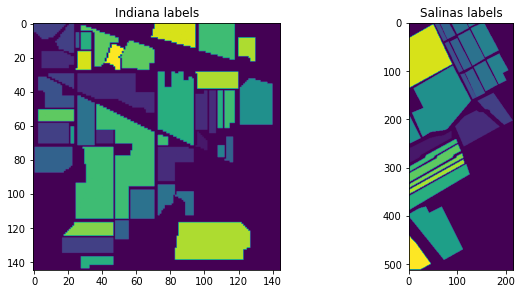

In [5]:
plot_two_figures(indiana_labels, salinas_labels, 'Indiana labels', 'Salinas labels')

We decided to display each label for both images so that we could easily compare them with our predictions (useful for unsupervised learning models). 

In [6]:
print('Number of labels for indiana image: {}'.format(n_labels_indiana))
print('Number of labels for salinas image: {}'.format(n_labels_salinas))

Number of labels for indiana image: 16
Number of labels for salinas image: 16


In [7]:
def plot_each_labels_no_comparaison(labels, nb_labels, title, figsize=(10, 10), cmap='viridis'):
    for x in range(0, nb_labels, 4):
        plt.figure(figsize=figsize)
        plt.subplot(4, 4, 1)
        plt.imshow(get_label(labels, x + 1), cmap=cmap)
        plt.title('{} label {}'.format(title, x + 1))
        
        plt.subplot(4, 4, 2)
        plt.imshow(get_label(labels, x + 2), cmap=cmap)
        plt.title('{} label {}'.format(title, x + 2))
        
        plt.subplot(4, 4, 3)
        plt.imshow(get_label(labels, x + 3), cmap=cmap)
        plt.title('{} label {}'.format(title, x + 3))
        
        plt.subplot(4, 4, 4)
        plt.imshow(get_label(labels, x + 4), cmap=cmap)
        plt.title('{} label {}'.format(title, x + 4))
        plt.show()

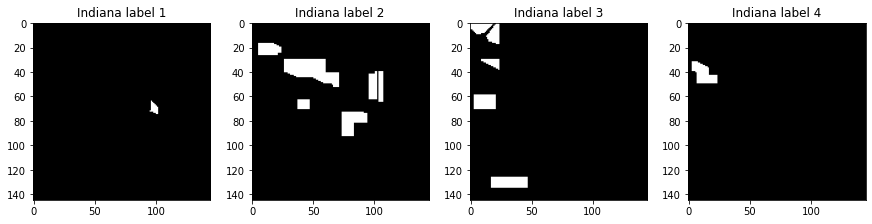

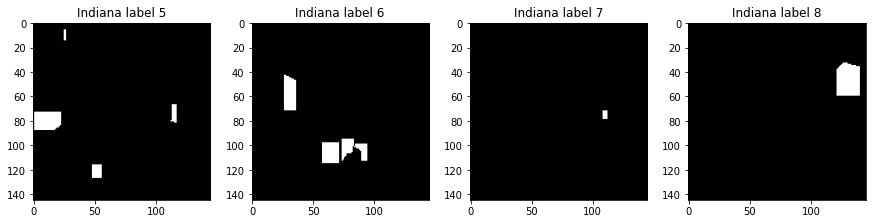

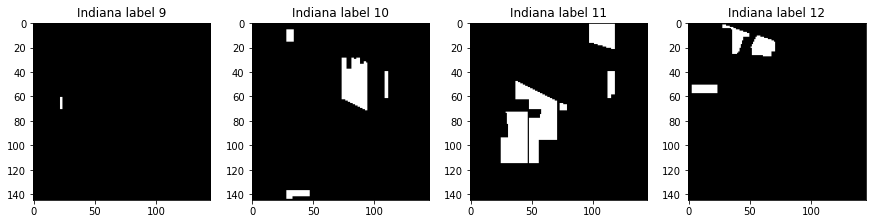

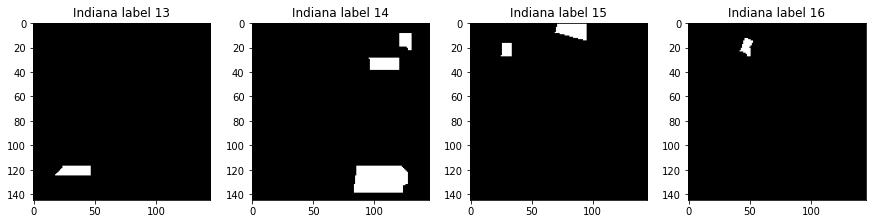

In [8]:
plot_each_labels_no_comparaison(indiana_labels, n_labels_indiana, 'Indiana', figsize=(15, 15), cmap='gray')

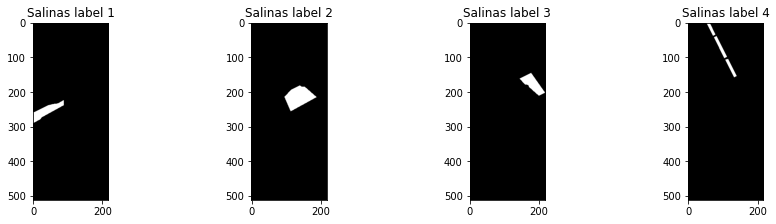

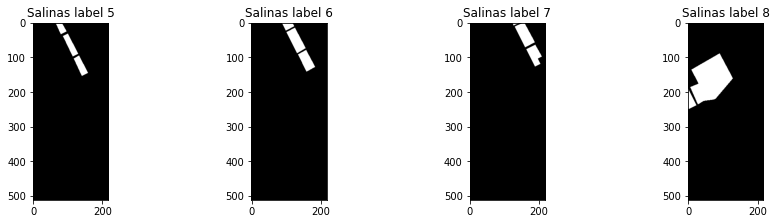

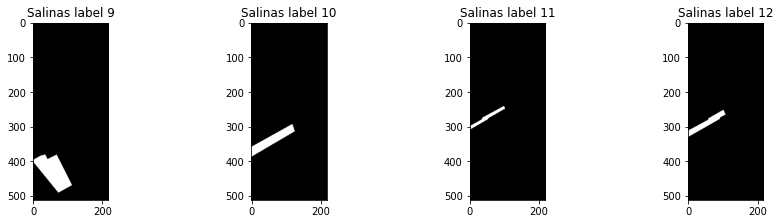

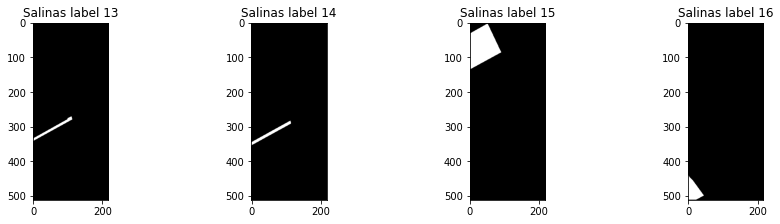

In [9]:
plot_each_labels_no_comparaison(salinas_labels, n_labels_salinas, 'Salinas', figsize=(15, 15), cmap='gray')

<hr style="background-color: rgb(0,0,0);height: 10.0px;"/>

# Unsupervised learning - Comparison

Reminder:

At the beginning, we used unsupervised learning models to perform classification. We can cite KMeans, MiniBatchMeans and GaussianMixture.

## Indiana image

In [10]:
# Load predictions for indiana image using unsupervised learning models
indiana_kmeans = np.load('../data/predictions/indiana_preds_kmeans.npy')
indiana_mini_kmeans = np.load('../data/predictions/indiana_preds_minibatch.npy')

indiana_gmm_with_outliers = np.load('../data/predictions/indiana_preds_gmm_with_outliers.npy')
indiana_gmm_no_outliers = np.load('../data/predictions/indiana_preds_gmm_without_outliers.npy')

### Comparison KMeans predictions with expected labels

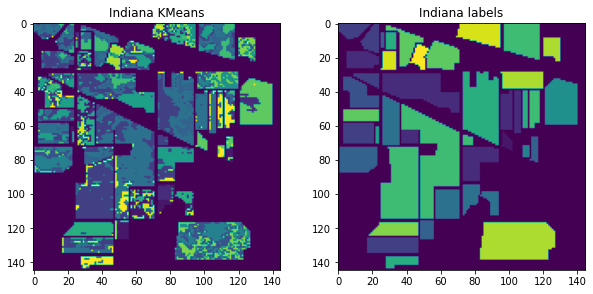

In [11]:
plot_two_figures(indiana_kmeans, indiana_labels, 'Indiana KMeans', 'Indiana labels')

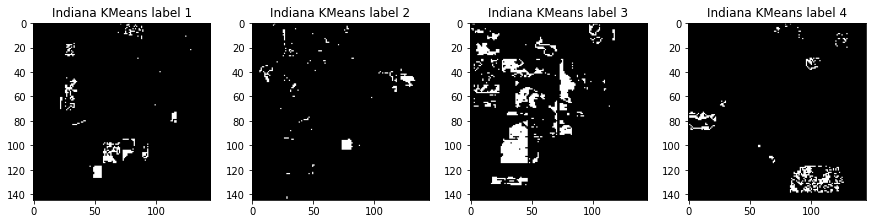

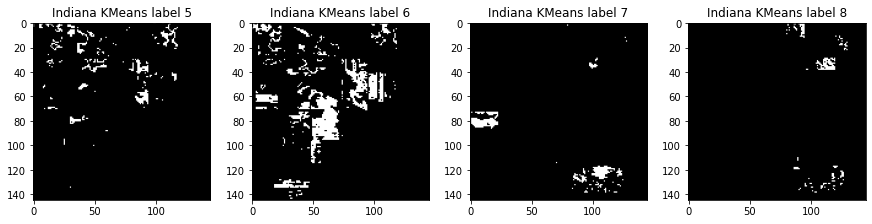

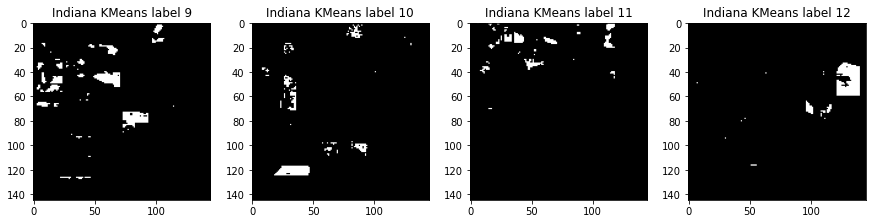

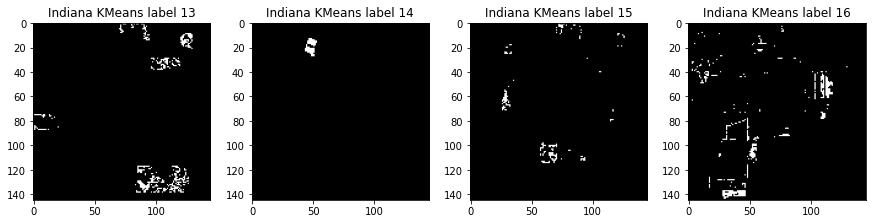

In [12]:
plot_each_labels_no_comparaison(indiana_kmeans, n_labels_indiana, 'Indiana KMeans', figsize=(15, 15), cmap='gray')

As we can see the KMeans model has not great results for this classification task.
The algorithm still struggle to separate pixels in proper classes.

### Comparison MiniBatchKMeans predictions with expected labels

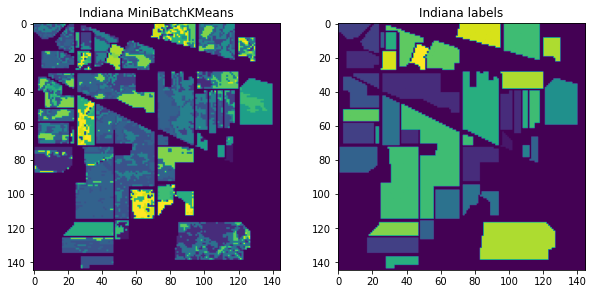

In [13]:
plot_two_figures(indiana_mini_kmeans, indiana_labels,'Indiana MiniBatchKMeans', 'Indiana labels')

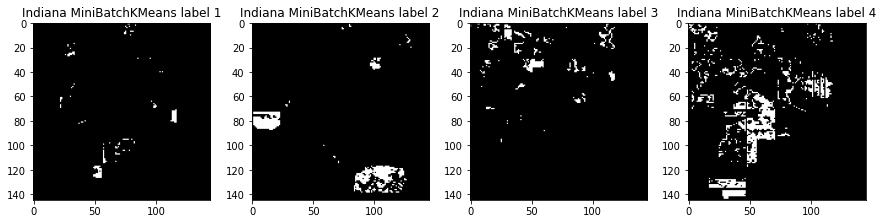

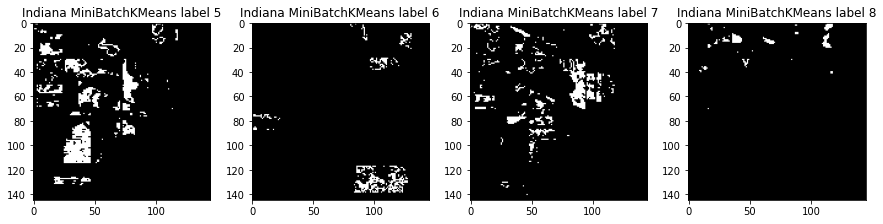

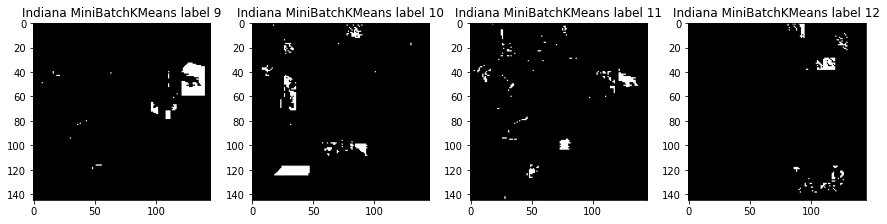

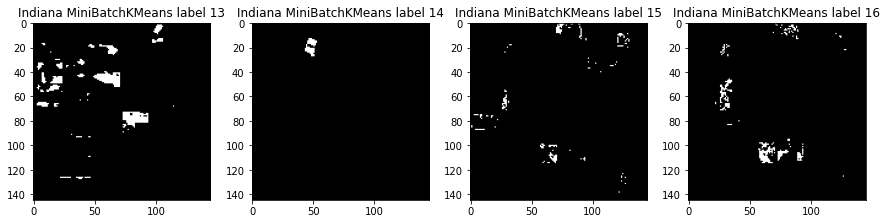

In [14]:
plot_each_labels_no_comparaison(indiana_mini_kmeans, n_labels_indiana, 'Indiana MiniBatchKMeans', figsize=(15, 15), cmap='gray')

The MiniBatchKMeans is not having better result than the KMeans. It also struggle to classify pixels. However, the execution is faster, the algorithm is converging faster.

### Comparison GMM - with / without outliers

Here, we compared two different approach:
 - GMM (Gaussian Mixture Model) on all the dataset
 - GMM on the dataset deprived of outliers pixels (outliers pixels can be found using RX Anomaly detector)

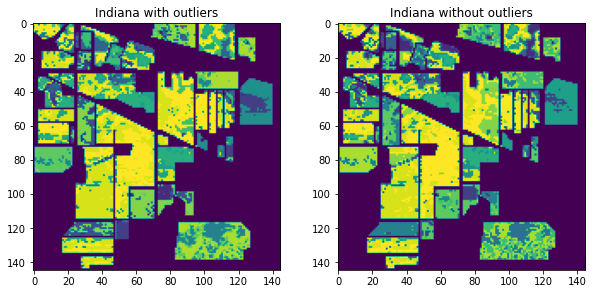

In [15]:
plot_two_figures(indiana_gmm_with_outliers, indiana_gmm_no_outliers, 'Indiana with outliers', 'Indiana without outliers')

We can notice that the predictions are different but we do not have the impression that there is an improvement. We can display each label for each image to compare more easily. 

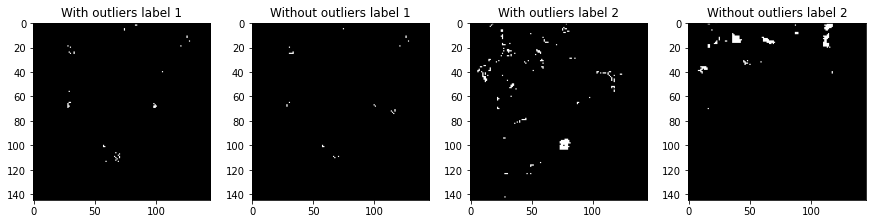

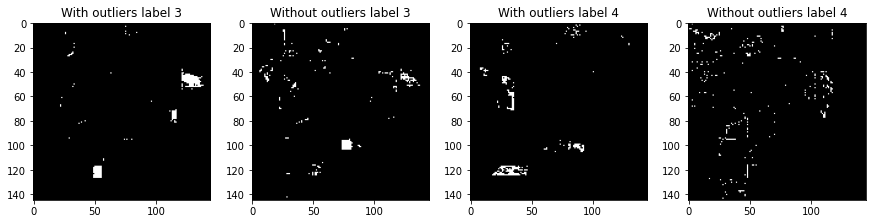

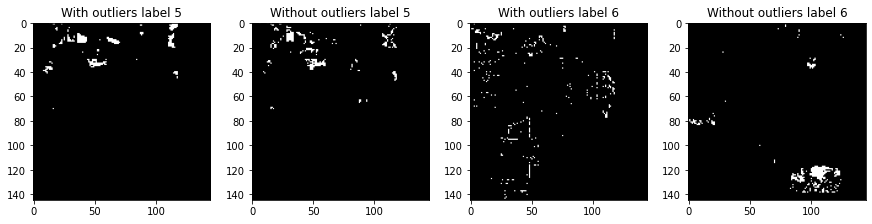

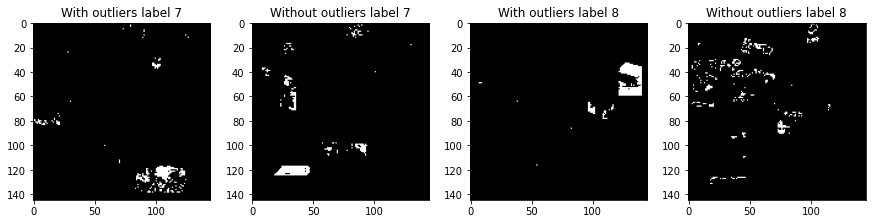

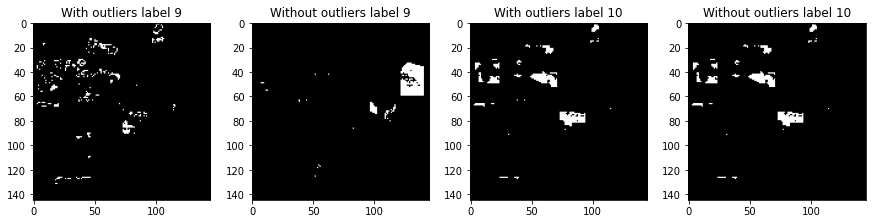

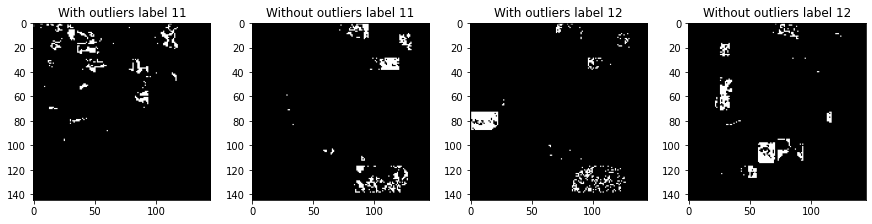

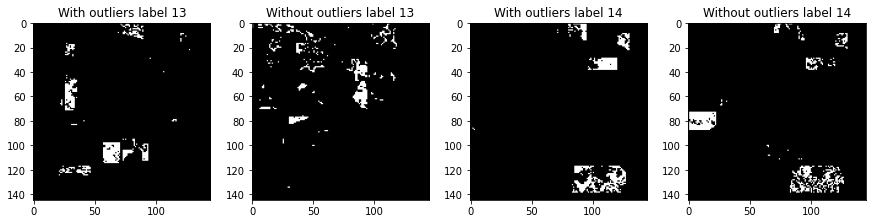

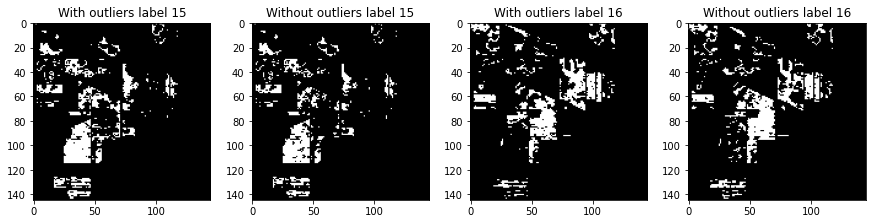

In [16]:
plot_each_labels(indiana_gmm_with_outliers, indiana_gmm_no_outliers, n_labels_indiana, 'With outliers', 'Without outliers', figsize=(15, 15), cmap='gray')

Here we can't see a huge difference between the two approach,
We can conclude that outliers pixels do not disturb the Gaussian Mixture Model. Even if both approach are similar, the results are not really impressive

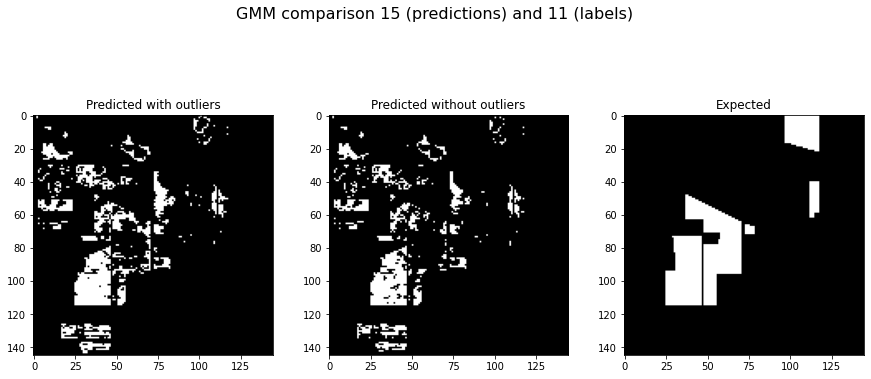

In [17]:
label = 15
indiana_label = 11

plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.imshow(get_label(indiana_gmm_with_outliers, label), cmap='gray')
plt.title('Predicted with outliers')

plt.subplot(3, 3, 2)
plt.imshow(get_label(indiana_gmm_no_outliers, label), cmap='gray')
plt.title('Predicted without outliers')

plt.subplot(3, 3, 3)
plt.imshow(get_label(indiana_labels, indiana_label), cmap='gray')
plt.title('Expected')
plt.suptitle('GMM comparison {} (predictions) and {} (labels)'.format(label, indiana_label), fontsize=16)
plt.show()

Here we manually made the label mapping between predictions and labels.
This is the closest possible label.

We can see that the GMM model is not really efficient on Indiana images.
But we can notice that GMM are still better than Kmean / MiniBatchKmeans.

## Salinas image

In [18]:
# Load predictions for salinas image using unsupervised learning models
salinas_kmeans = np.load('../data/predictions/salinas_preds_kmeans.npy')
salinas_mini_kmeans = np.load('../data/predictions/salinas_preds_minibatch.npy')

salinas_gmm_with_outliers = np.load('../data/predictions/salinas_preds_gmm_with_outliers.npy')
salinas_gmm_no_outliers = np.load('../data/predictions/salinas_preds_gmm_without_outliers.npy')

### Comparison KMeans predictions with expected labels

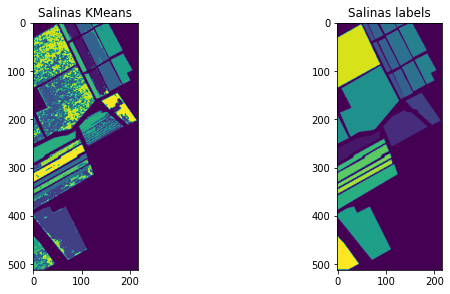

In [19]:
plot_two_figures(salinas_kmeans, salinas_labels, 'Salinas KMeans', 'Salinas labels')

As expected, the salinas pixels are easier to classify. With Kmeans we have correct but not amazing results.

### Comparison MiniBatchKMeans predictions with expected labels

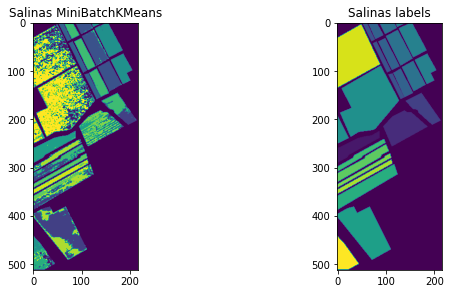

In [20]:
plot_two_figures(salinas_mini_kmeans, salinas_labels, 'Salinas MiniBatchKMeans', 'Salinas labels')

As we can see, MiniBatchKMeans is worse than classic KMeans in the salinas pixels classification task.

### Comparison GMM - with / without outliers

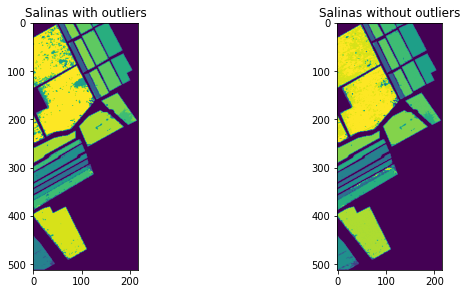

In [21]:
plot_two_figures(salinas_gmm_with_outliers, salinas_gmm_no_outliers, 'Salinas with outliers', 'Salinas without outliers')

We can see that both models are quite similar in term of results. We can still notice that GMM on salinas with outliers had better results.

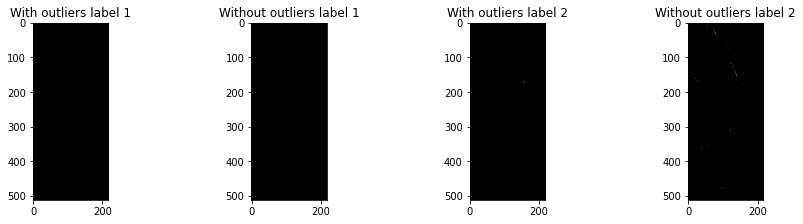

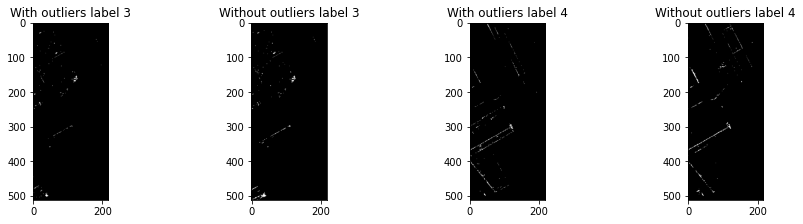

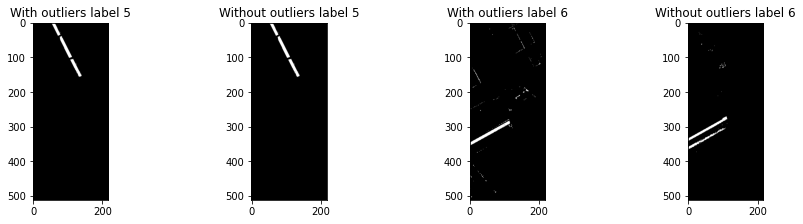

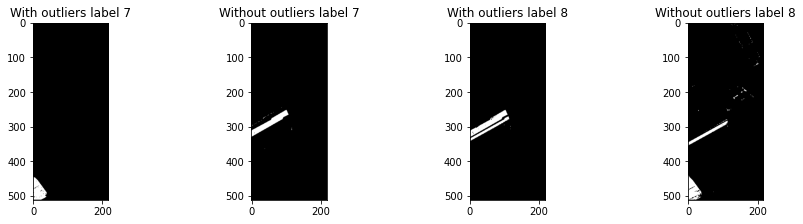

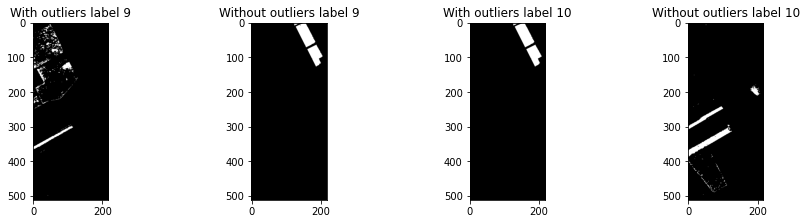

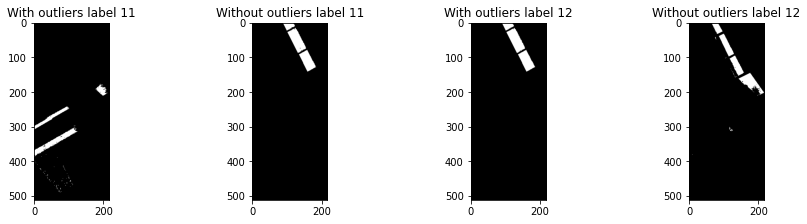

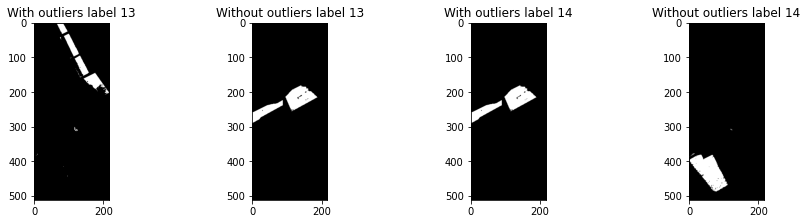

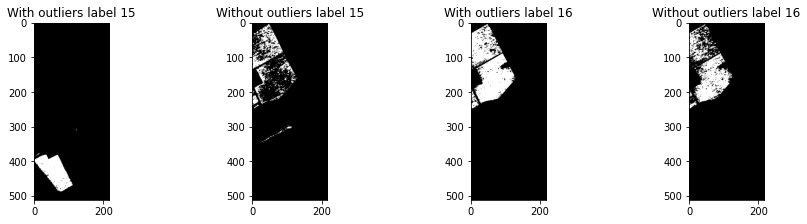

In [22]:
plot_each_labels(salinas_gmm_with_outliers, salinas_gmm_no_outliers, n_labels_salinas, 'With outliers', 'Without outliers', figsize=(15, 15), cmap='gray')

Looking only at each label's predictions with and without outliers, we don't feel like there are a lot of differences. We can choose a specific label to compare.

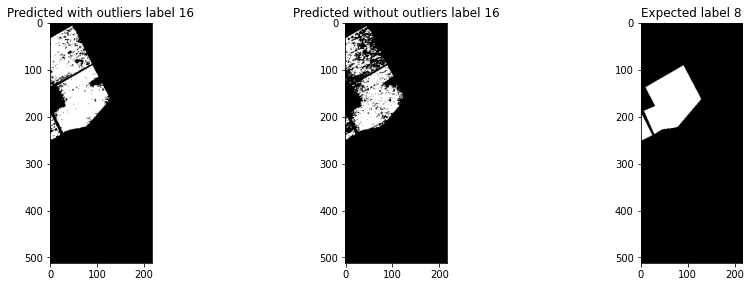

In [23]:
label = 16
salinas_label = 8

plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.imshow(get_label(salinas_gmm_with_outliers, label), cmap='gray')
plt.title('Predicted with outliers label {}'.format(label))

plt.subplot(3, 3, 2)
plt.imshow(get_label(salinas_gmm_no_outliers, label), cmap='gray')
plt.title('Predicted without outliers label {}'.format(label))

plt.subplot(3, 3, 3)
plt.imshow(get_label(salinas_labels, salinas_label), cmap='gray')
plt.title('Expected label {}'.format(salinas_label))
plt.show()

Looking at the predictions for tag 16 in more detail, we can see that the prediction without the outliers is better even if there is noise on the expected part. 

The GMM global result on salinas image is quite impressive for an unsupervised learning algorithm.

## Unsupervised learning - Conclusion

Using KMeans or MiniBatchKMeans models, we notice that all the labels are found everywhere in the images. We don't have the impression that there is a real classification. Whereas with GMM, we can distinguish some pattern with a lot of noise. 

If we are to use unsupervised learning algorithm to perform the classification, we will choose GMM.

<hr style="background-color: rgb(0,0,0);height: 10.0px;"/>

# Supervised learning - Comparison

Reminder:

We decided to use supervised learning models to perform classification because the classification with unsupervised learning models seems not good enough. We used GaussianNaiveBayes, SVC and Random Forest.

## Indiana image

In [24]:
# Load predictions for indiana image using supervised learning models

indiana_gaussian_naive = np.load('../data/predictions/indiana_preds_gaussianNaiveBayes.npy')
indiana_svc_linear = np.load('../data/predictions/indiana_preds_linearSVC.npy')
indiana_svc = np.load('../data/predictions/indiana_preds_SVC.npy')
indiana_random_forest = np.load('../data/predictions/indiana_preds_randomForest.npy')

### Comparison GaussianNaiveBayes predictions with expected labels

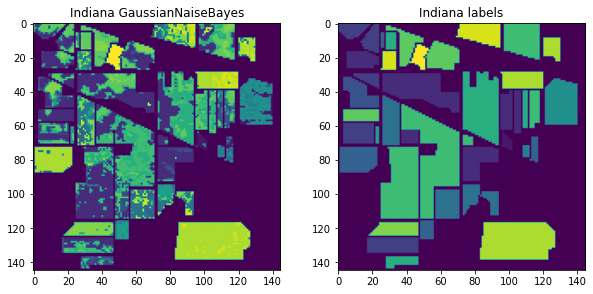

In [25]:
plot_two_figures(indiana_gaussian_naive, indiana_labels, 'Indiana GaussianNaiseBayes', 'Indiana labels')

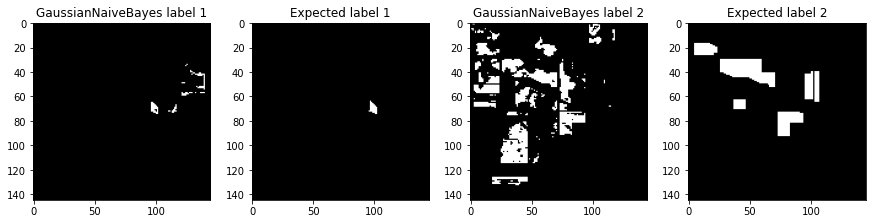

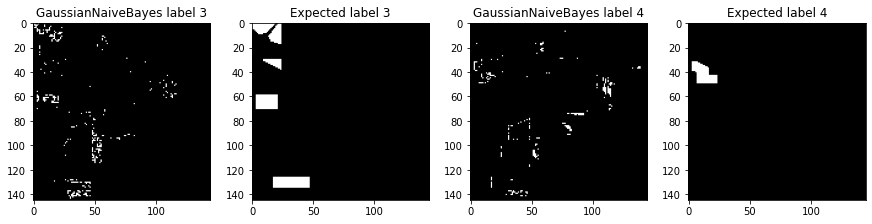

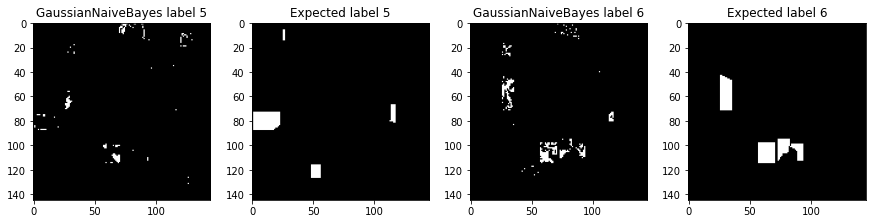

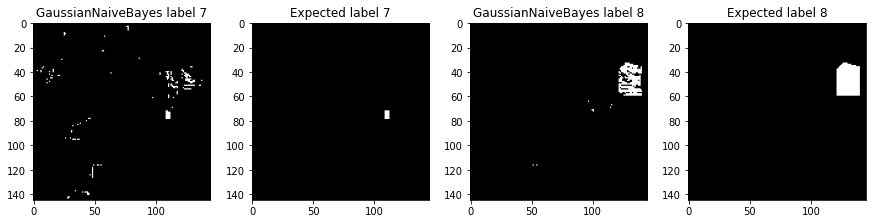

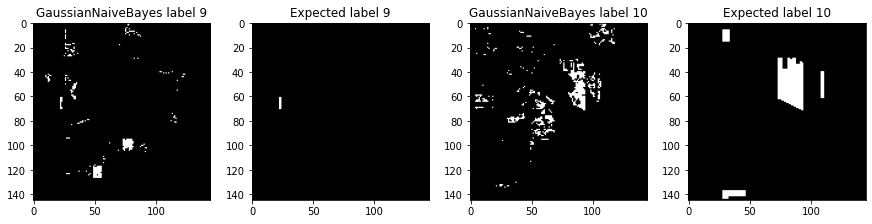

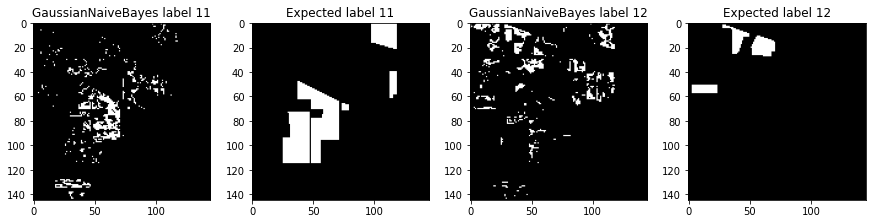

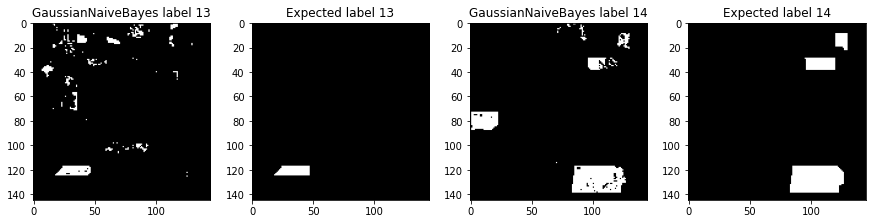

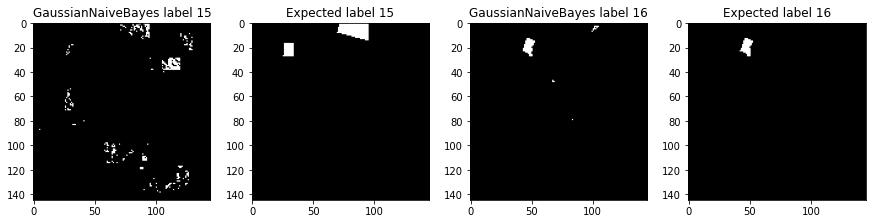

In [26]:
plot_each_labels(indiana_gaussian_naive, indiana_labels, n_labels_indiana, 'GaussianNaiveBayes', 'Expected',figsize=(15, 15), cmap='gray')

Some labels are well classified (labels 1, 6, 8 and 16) but in general, the results are correct but not amazing. If we look at labels 11 and 12, there is too many noise to clearly see the pattern.

### Comparison SVC Linear predictions with expected labels

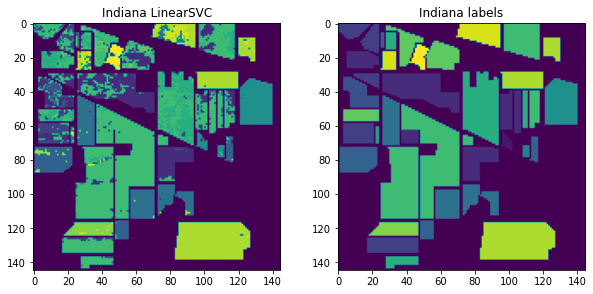

In [27]:
plot_two_figures(indiana_svc_linear, indiana_labels, 'Indiana LinearSVC', 'Indiana labels')

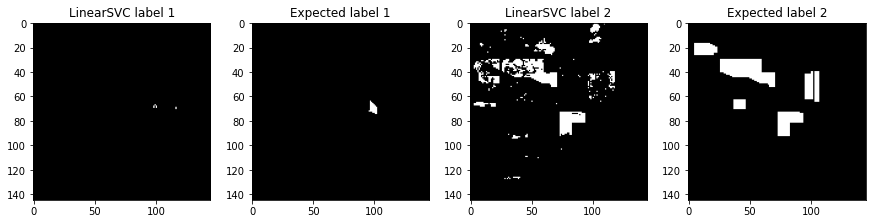

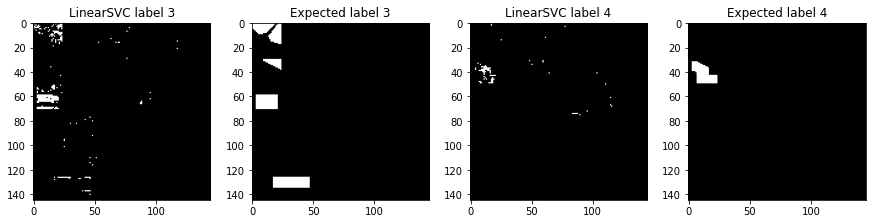

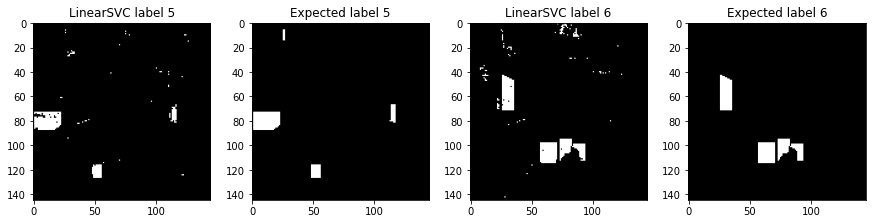

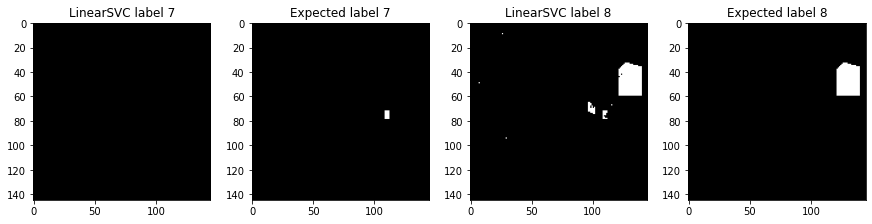

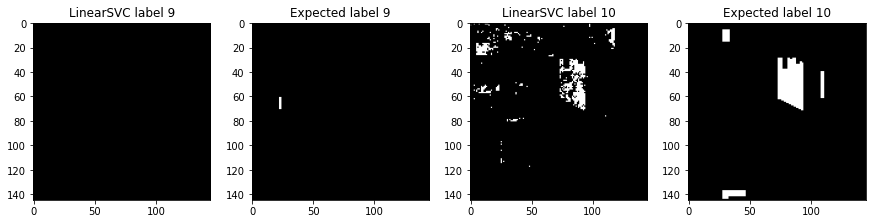

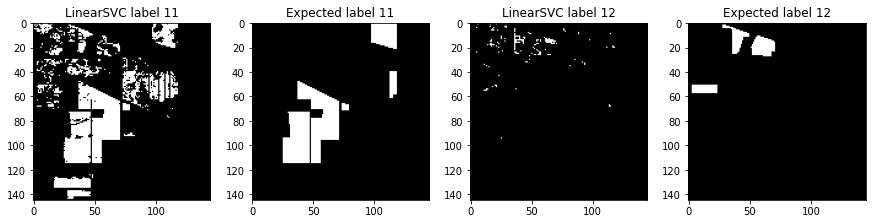

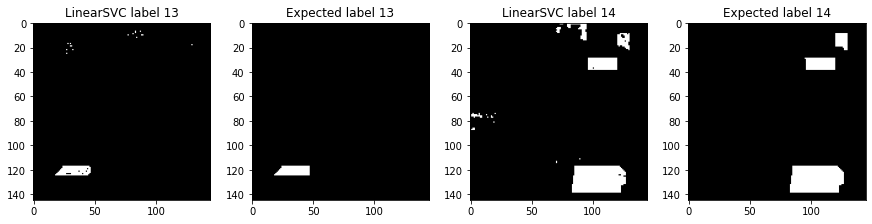

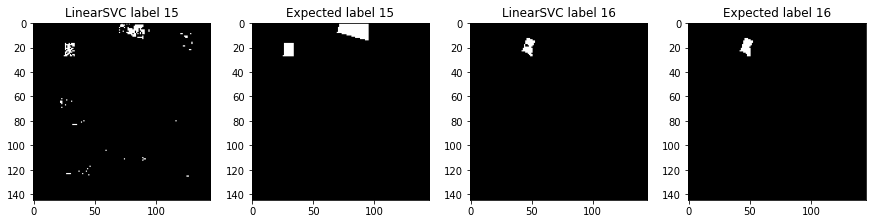

In [28]:
plot_each_labels(indiana_svc_linear, indiana_labels, n_labels_indiana, 'LinearSVC', 'Expected',figsize=(15, 15), cmap='gray')

For some labels, this model is obviously better (labels 2, 13, 14 and 16). There is less noise because most of the samples have been classified in the label 11. 

Compared to GaussianNaiveBayes, we can obtained better results with LinearSVC.

### Comparison SVC predictions with expected labels

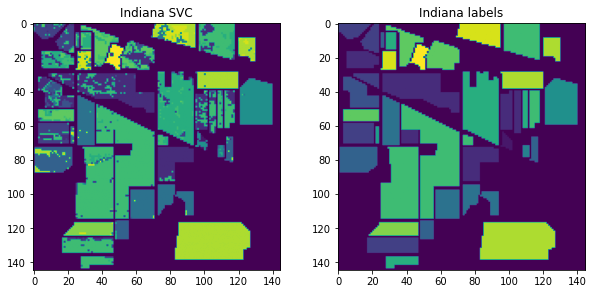

In [29]:
plot_two_figures(indiana_svc, indiana_labels, 'Indiana SVC', 'Indiana labels')

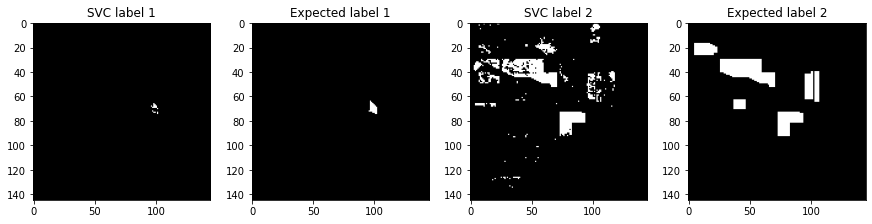

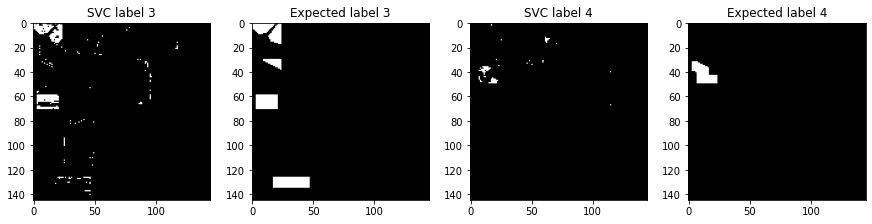

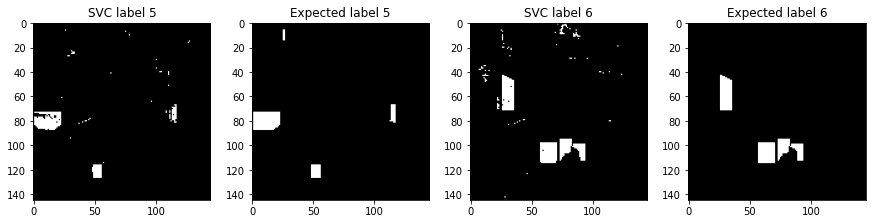

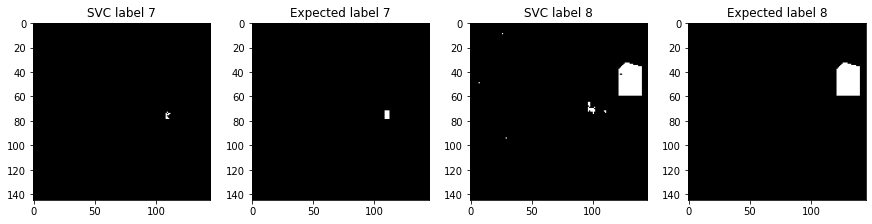

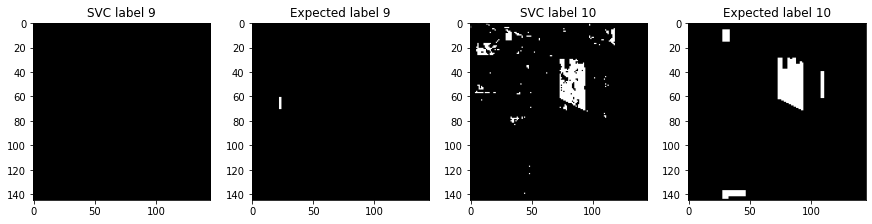

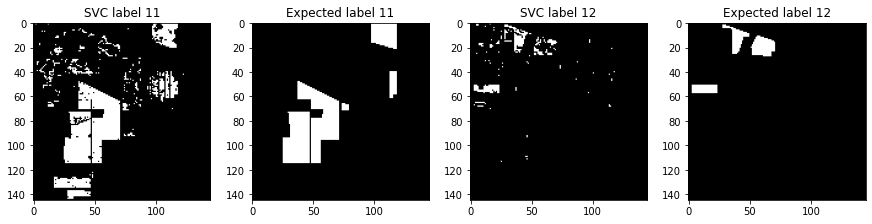

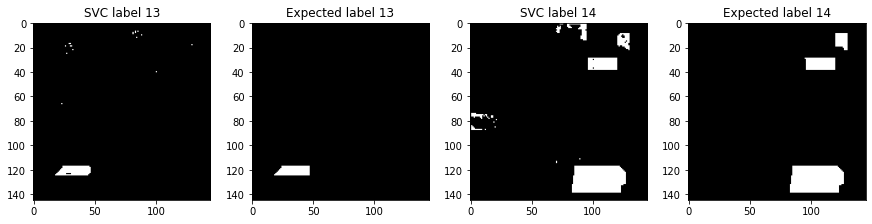

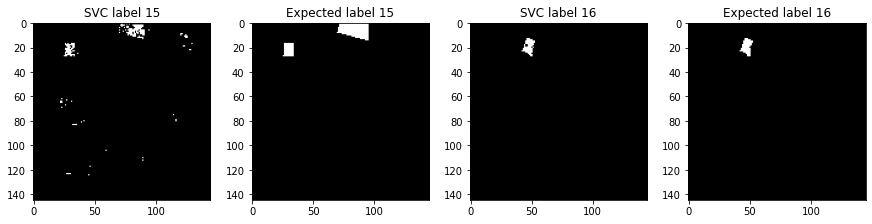

In [30]:
plot_each_labels(indiana_svc, indiana_labels, n_labels_indiana, 'SVC', 'Expected',figsize=(15, 15), cmap='gray')

With the default kernel 'rbf' of SVC, we got better results and there is less noise for the label 11.

### Comparison Random Forest predictions with expected labels

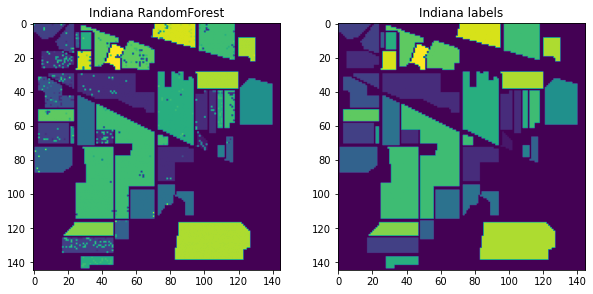

In [31]:
plot_two_figures(indiana_random_forest, indiana_labels, 'Indiana RandomForest', 'Indiana labels')

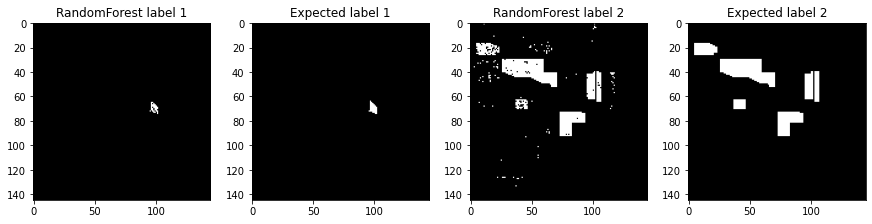

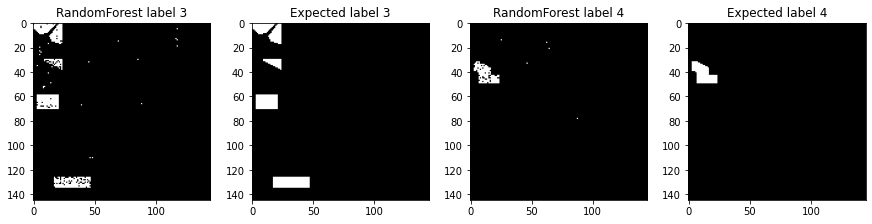

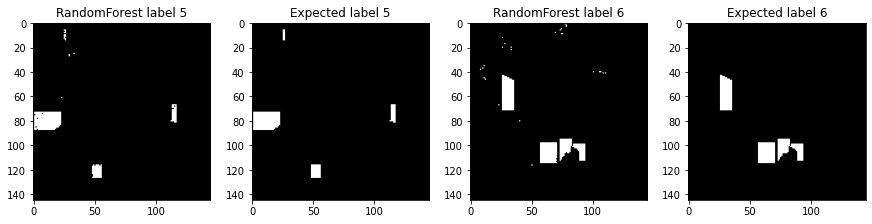

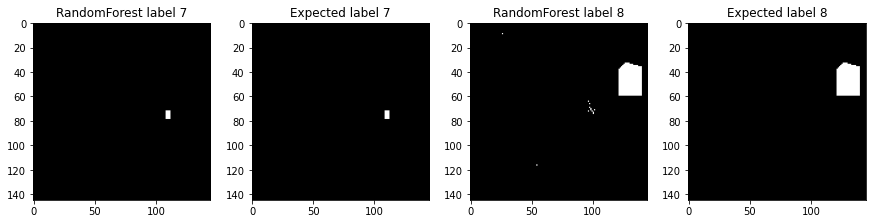

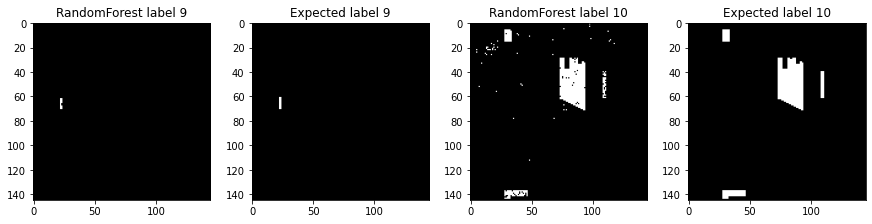

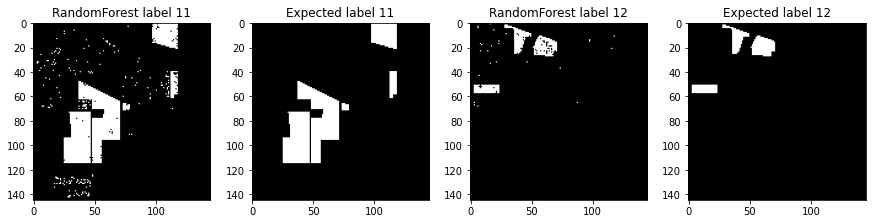

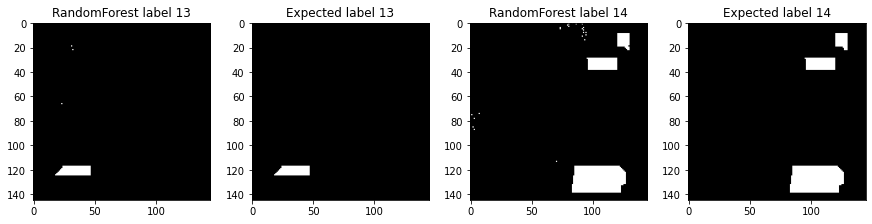

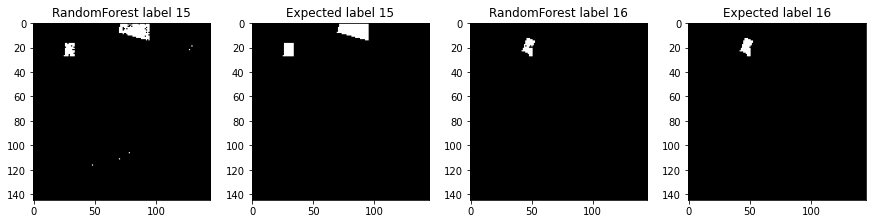

In [32]:
plot_each_labels(indiana_random_forest, indiana_labels, n_labels_indiana, 'RandomForest', 'Expected',figsize=(15, 15), cmap='gray')

The results with RandomForest are impressive. Every label are well recognized except some which have a few noise

## Salinas image

In [33]:
# Load predictions for salinas image using supervised learning models

salinas_gaussian_naive = np.load('../data/predictions/salinas_preds_gaussianNaiveBayes.npy')
salinas_svc_linear = np.load('../data/predictions/salinas_preds_linearSVC.npy')
salinas_svc = np.load('../data/predictions/salinas_preds_SVC.npy')
salinas_random_forest = np.load('../data/predictions/salinas_preds_randomForest.npy')

### Comparison GaussianNaiveBayes predictions with expected labels

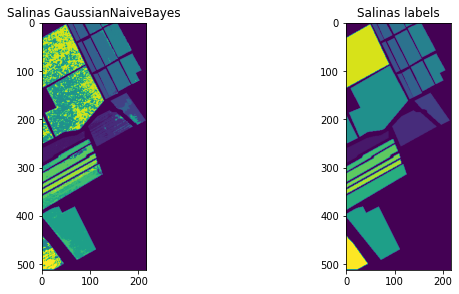

In [34]:
plot_two_figures(salinas_gaussian_naive, salinas_labels, 'Salinas GaussianNaiveBayes', 'Salinas labels')

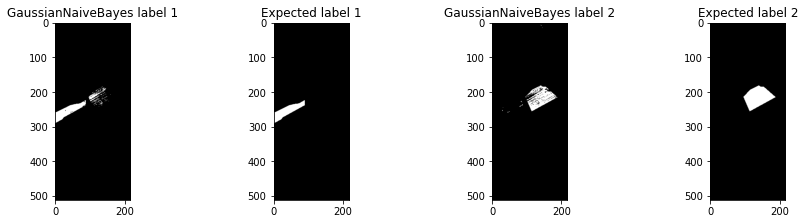

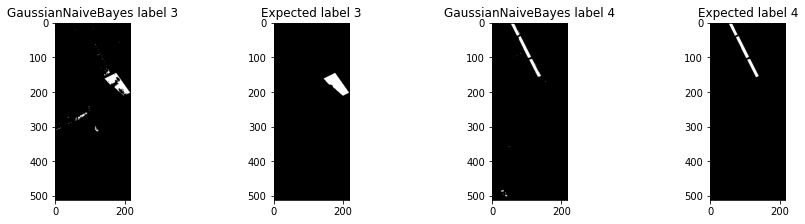

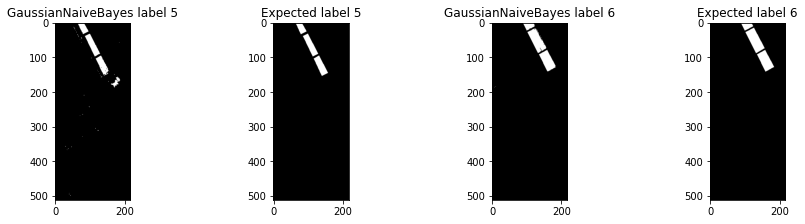

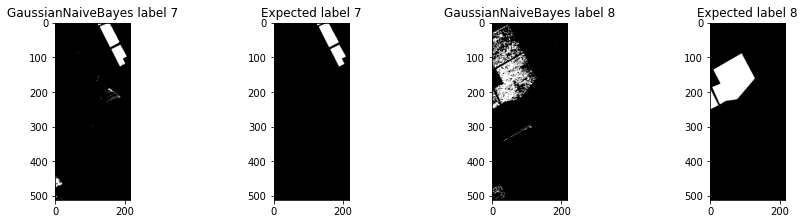

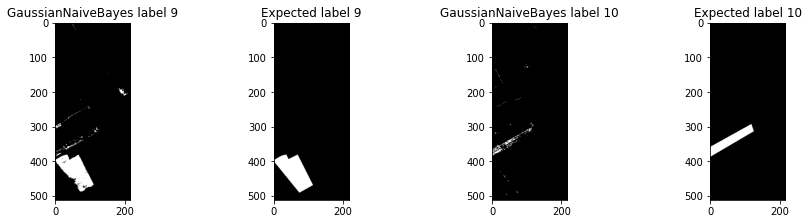

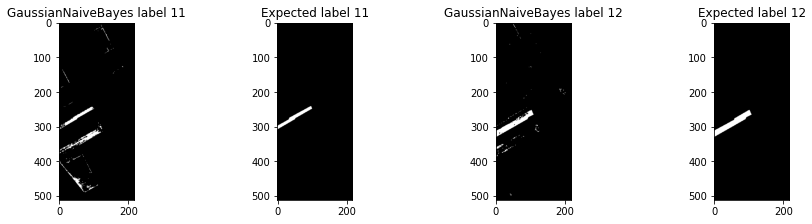

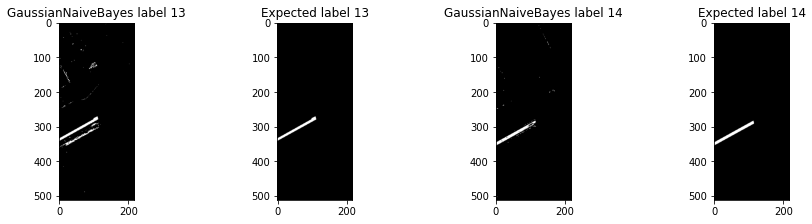

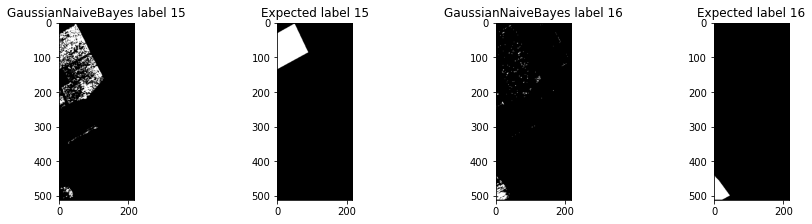

In [35]:
plot_each_labels(salinas_gaussian_naive, salinas_labels, n_labels_salinas, 'GaussianNaiveBayes', 'Expected',figsize=(15, 15), cmap='gray')

GaussianNaiveBayes gives us results which are correct. All labels are well presented except labels 8 and 15 which seem too similar. 

### Comparison SVC Linear predictions with expected labels

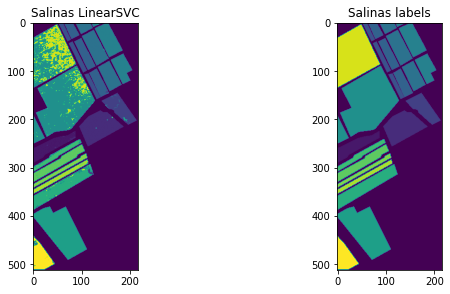

In [36]:
plot_two_figures(salinas_svc_linear, salinas_labels, 'Salinas LinearSVC', 'Salinas labels')

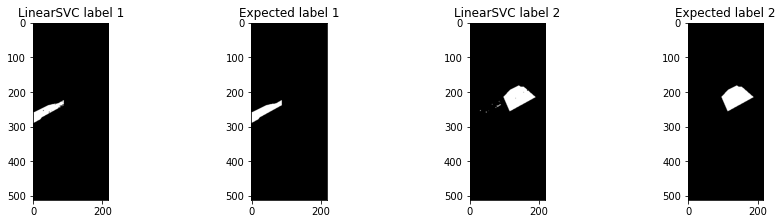

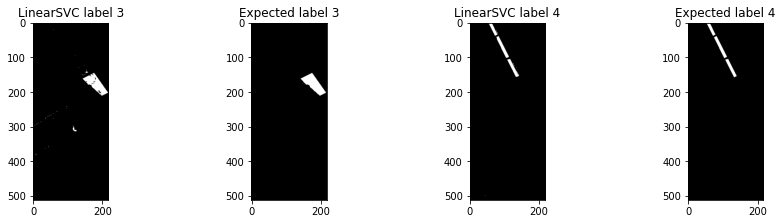

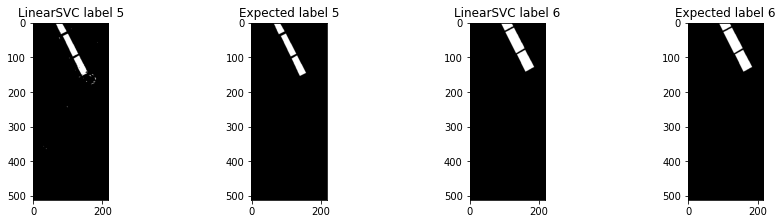

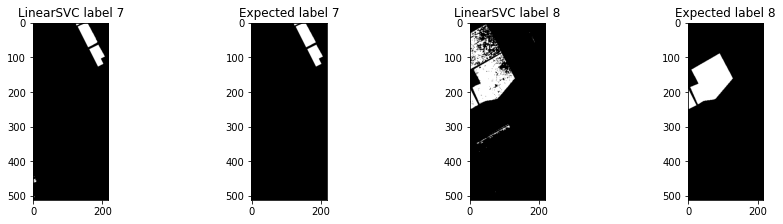

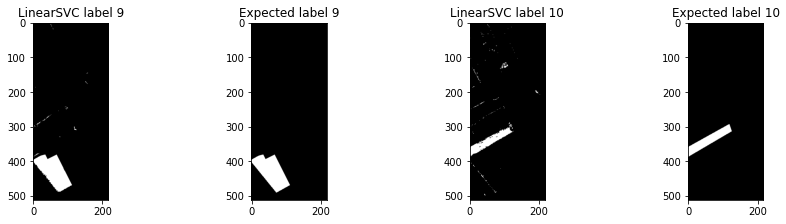

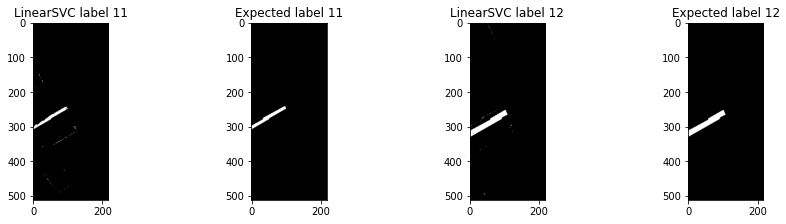

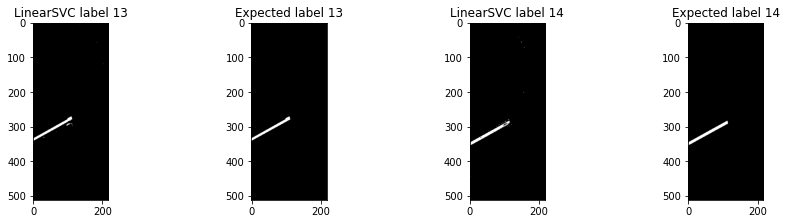

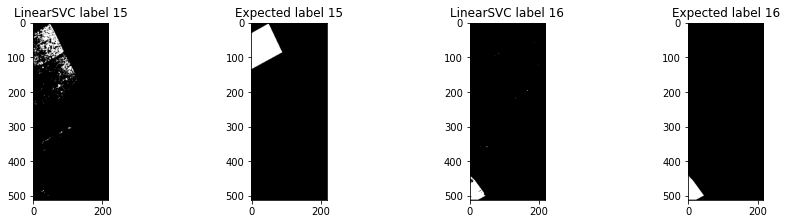

In [37]:
plot_each_labels(salinas_svc_linear, salinas_labels, n_labels_salinas, 'LinearSVC', 'Expected',figsize=(15, 15), cmap='gray')

With a LinearSVC kernel, the predictions seem correct and a little bit better than GaussianNaiveBayes for labels 8 and 15.

### Comparison SVC predictions with expected labels

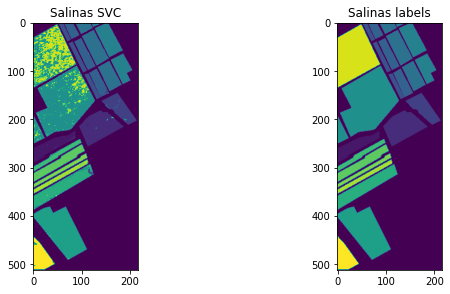

In [38]:
plot_two_figures(salinas_svc, salinas_labels, 'Salinas SVC', 'Salinas labels')

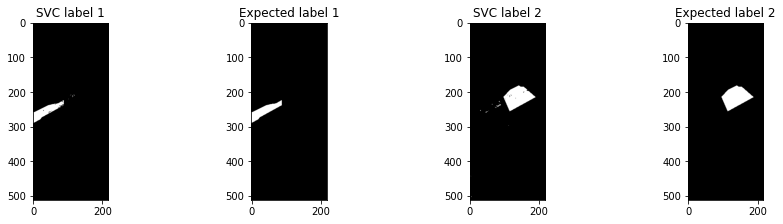

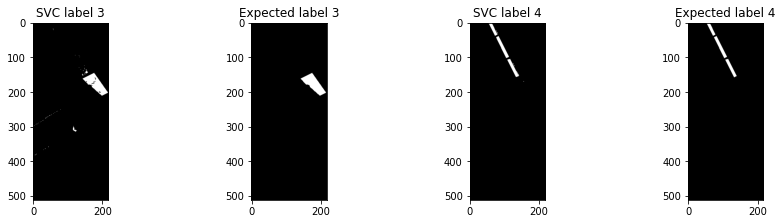

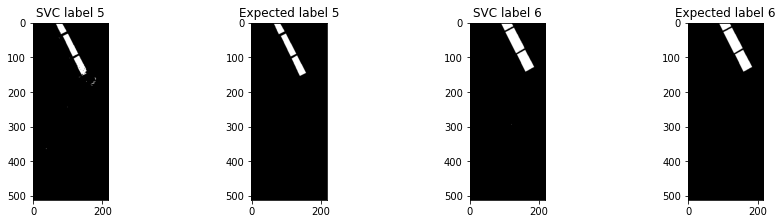

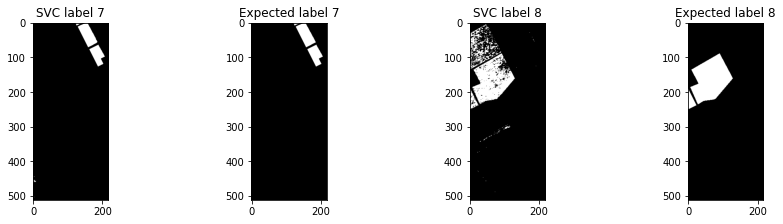

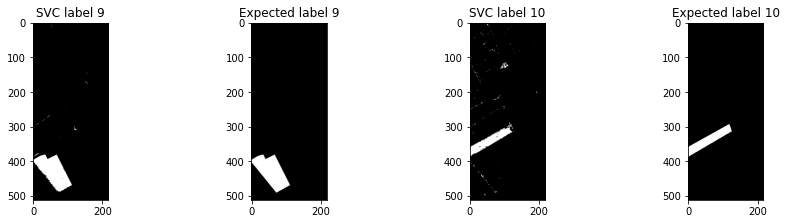

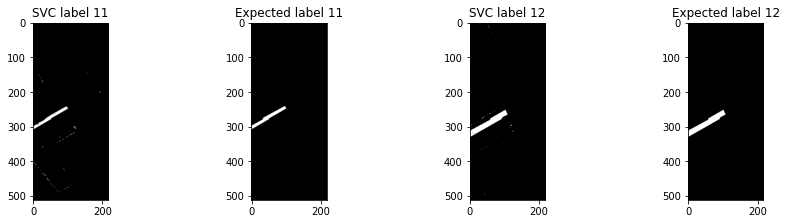

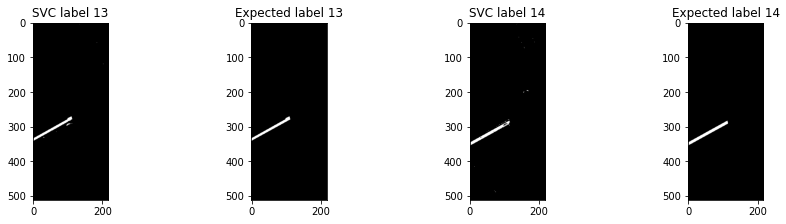

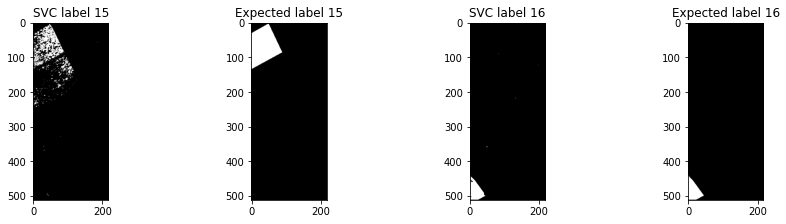

In [39]:
plot_each_labels(salinas_svc, salinas_labels, n_labels_salinas, 'SVC', 'Expected',figsize=(15, 15), cmap='gray')

We do not notice any improvement between LinearSVC and RBF SVC. The classification is still correct with the same errors for the same labels.

### Comparison Random Forest predictions with expected labels

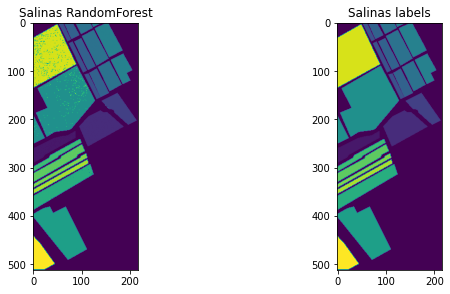

In [40]:
plot_two_figures(salinas_random_forest, salinas_labels, 'Salinas RandomForest', 'Salinas labels')

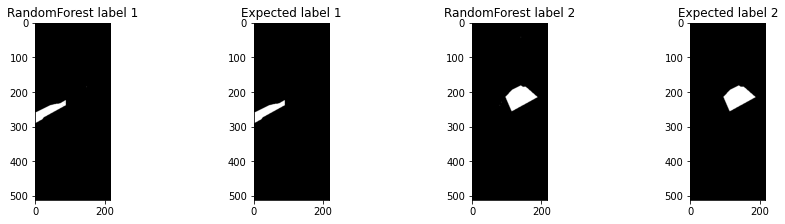

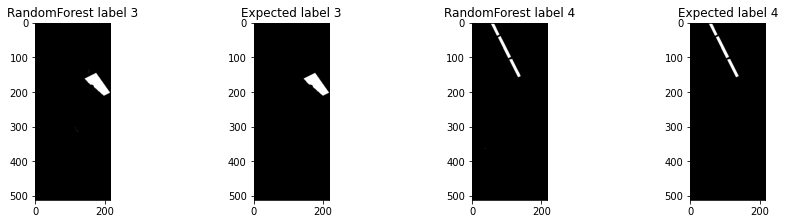

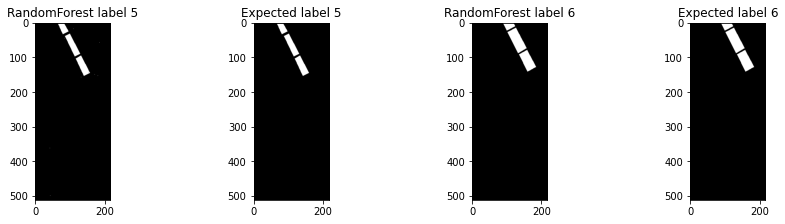

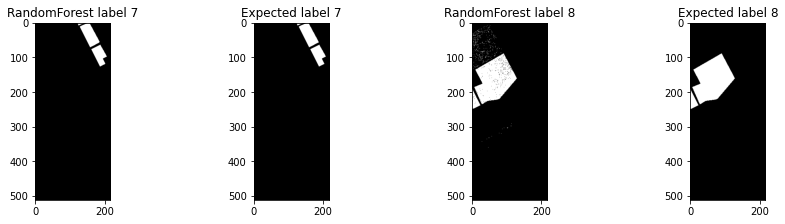

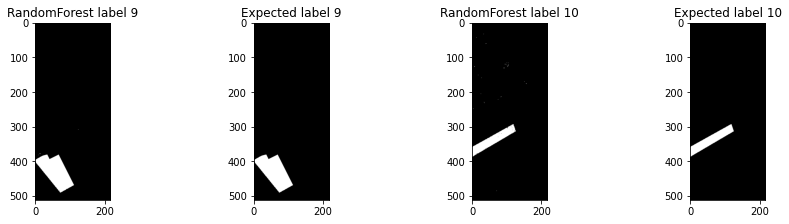

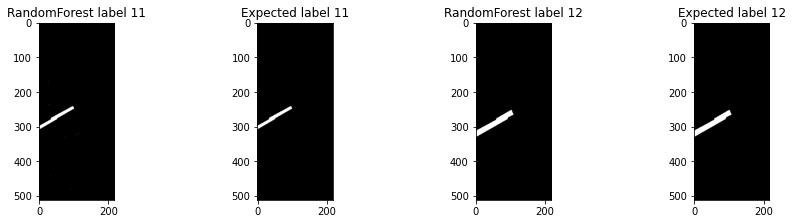

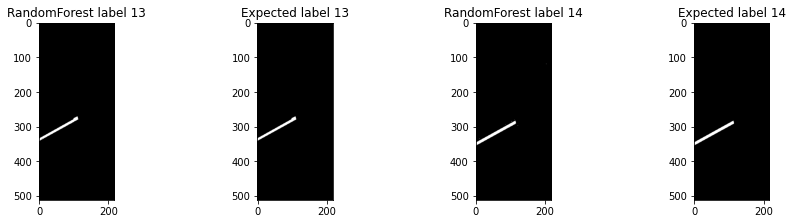

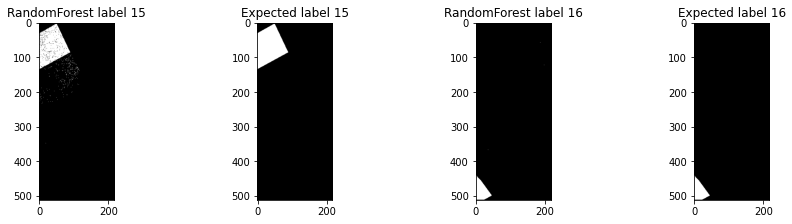

In [41]:
plot_each_labels(salinas_random_forest, salinas_labels, n_labels_salinas, 'RandomForest', 'Expected',figsize=(15, 15), cmap='gray')

The results are impressive with RandomForest. All the classes are well recognized and we hardly see a little noise for the labels 8 and 15. It is much better than the previous models. 

## Score comparison between each models for both images

Reminder:\
test_score and train_score are computed from model's method\
mean_test_score and mean_train_score are computed as the mean score for each label

We ourselves implemented GaussianNaiveBayes which explains these missing values for test_score and train_score 

In [42]:
# Loading score file
try:
    score = pd.read_csv('../data/score.csv')
    display(score)
except Exception:
    score = None
    print('{} not found'.format('score.csv'))

,model,image,test_score,train_score,mean_test_score,mean_train_score
0,GaussianNaiveBayes,indiana,NaN,NaN,0.548400,0.527884
1,GaussianNaiveBayes,salinas,NaN,NaN,0.812653,0.802731
2,OneVsOneClassifier - LinearSVC,indiana,0.691320,0.700260,0.540185,0.562465
3,OneVsOneClassifier - LinearSVC,salinas,0.882840,0.880962,0.922378,0.921108
4,OneVsOneClassifier - SVC,indiana,0.759439,0.778255,0.622156,0.669541
5,OneVsOneClassifier - SVC,salinas,0.898870,0.899167,0.938070,0.937068
6,RandomForest,indiana,0.818217,1.000000,0.726056,1.000000
7,RandomForest,salinas,0.941494,1.000000,0.971870,1.000000


#### Score comparision - Indiana

In [43]:
if score is not None:
    display(score.loc[score['image'] == 'indiana'])

,model,image,test_score,train_score,mean_test_score,mean_train_score
0,GaussianNaiveBayes,indiana,NaN,NaN,0.548400,0.527884
2,OneVsOneClassifier - LinearSVC,indiana,0.691320,0.700260,0.540185,0.562465
4,OneVsOneClassifier - SVC,indiana,0.759439,0.778255,0.622156,0.669541
6,RandomForest,indiana,0.818217,1.000000,0.726056,1.000000


We can notice that RandomForest is the best model to classify the Indiana image. Although its mean_test_score score is only 0.72, it allows us to have incredible results.

We can see that although the test_score and mean_test_score columns do not contain the same values, the score increases (same for train_score).

#### Score comparision - Salinas

In [44]:
if score is not None:
    display(score.loc[score['image'] == 'salinas'])

,model,image,test_score,train_score,mean_test_score,mean_train_score
1,GaussianNaiveBayes,salinas,NaN,NaN,0.812653,0.802731
3,OneVsOneClassifier - LinearSVC,salinas,0.882840,0.880962,0.922378,0.921108
5,OneVsOneClassifier - SVC,salinas,0.898870,0.899167,0.938070,0.937068
7,RandomForest,salinas,0.941494,1.000000,0.971870,1.000000


We can make exactly the same comments as for the Indiana image. 

With a mean_train_score score 1, we can suppose that our model is overfitting but we get a score of 0.97 on testing data. We are really achieving impressive results on Salinas image. 

## Supervised learning - Conclusion

With GaussianNaiveBayes, we get too much noise but the classification still works good enough to distinguish some pattern between expected and predicted labels.\
We can not notice a big difference between LinearSVC and RBF SVC predictions. It is better than GaussianNaiveBayes but there are noise on two specific labels.

In [45]:
if score is not None:
    display(score.loc[(score['model'] == 'RandomForest')])

,model,image,test_score,train_score,mean_test_score,mean_train_score
6,RandomForest,indiana,0.818217,1.0,0.726056,1.0
7,RandomForest,salinas,0.941494,1.0,0.971870,1.0


For both images, the best model is RandomForest. It allows us to obtain scores greater than 0.70 and very little noise on the prediction images. 

<hr style="background-color: rgb(0,0,0);height: 10.0px;"/>

# Conclusion

We can note that with unsupervised learning models, we got too much noise on our predictions whereas on supervised learning predictions, we can easily distinguish some pattern.

We decided to use RandomForest model to perform classification on both images.

### Confusion matrix and classification report on Indiana

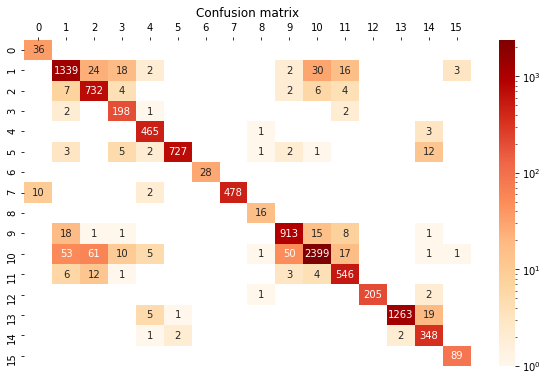

In [46]:
plot_confusion_matrix(indiana_random_forest[indiana_random_forest != 0], indiana_labels[indiana_labels != 0], indiana_class_names, log=True)

In [47]:
print(classification_report(indiana_labels[indiana_labels != 0], indiana_random_forest[indiana_random_forest != 0], target_names=indiana_class_names))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        46
           1       0.93      0.94      0.94      1428
           2       0.97      0.88      0.92       830
           3       0.98      0.84      0.90       237
           4       0.99      0.96      0.98       483
           5       0.97      1.00      0.98       730
           6       1.00      1.00      1.00        28
           7       0.98      1.00      0.99       478
           8       1.00      0.80      0.89        20
           9       0.95      0.94      0.95       972
          10       0.92      0.98      0.95      2455
          11       0.95      0.92      0.94       593
          12       0.99      1.00      0.99       205
          13       0.98      1.00      0.99      1265
          14       0.99      0.90      0.94       386
          15       1.00      0.96      0.98        93

    accuracy                           0.95     10249
   macro avg       0.97   

Confusion matrix and classification report are both impressive.\
The smaller f1-score is only 0.88 which is a high score for other models.\
With the confusion matrix, we can see that there are some noise on our prediction image but we can easily see the diagonal of the matrix (which corresponds to true positives) .

### Confusion matrix and classification report on Salinas

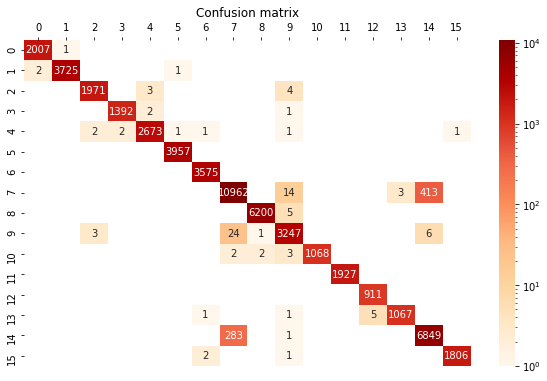

In [48]:
plot_confusion_matrix(salinas_random_forest[salinas_random_forest != 0], salinas_labels[salinas_labels != 0], indiana_class_names, log=True)

In [49]:
print(classification_report(salinas_labels[salinas_labels != 0], salinas_random_forest[salinas_random_forest != 0], target_names=indiana_class_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2009
           1       1.00      1.00      1.00      3726
           2       1.00      1.00      1.00      1976
           3       1.00      1.00      1.00      1394
           4       1.00      1.00      1.00      2678
           5       1.00      1.00      1.00      3959
           6       1.00      1.00      1.00      3579
           7       0.96      0.97      0.97     11271
           8       1.00      1.00      1.00      6203
           9       0.99      0.99      0.99      3278
          10       0.99      1.00      1.00      1068
          11       1.00      1.00      1.00      1927
          12       1.00      0.99      1.00       916
          13       0.99      1.00      1.00      1070
          14       0.96      0.94      0.95      7268
          15       1.00      1.00      1.00      1807

    accuracy                           0.99     54129
   macro avg       0.99   

On salinas image, the results are even more impressive. Each metric varies between 0.94 and 1 and on the confusion matrix, there are very few errors.

# Explanation about the results obtained 

For most models, we have noticed that it is easier to classify salinas image. We noticed during our analysis of the dataset that it contains less outliers. 

### On Indiana image

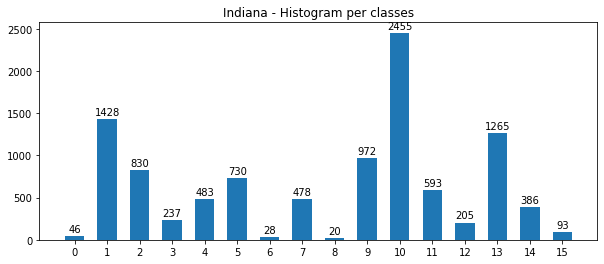

In [50]:
plot_histogram(indiana_labels[indiana_labels != 0] - 1, title='Indiana - Histogram per classes')

We can note that the two labels (labels 0 and 8) with the lowest f1-score have less than 50 samples in total. There are therefore only about thirty samples for training (75% of the data for training). Furthermore, we have a highly unbalanced dataset for indiana image. The number of samples varies between 20 and 2400 but the model still manages to classify well.

### On Salinas image

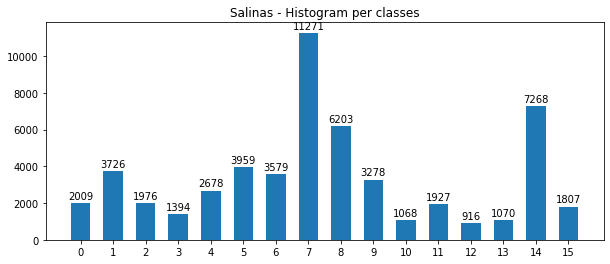

In [51]:
plot_histogram(salinas_labels[salinas_labels != 0] - 1, title='Salinas - Histogram per classes')

We can make the same remarks as before. The results on Salinas image are more impressive.